In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [212]:
#loading the dataset
data=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#1) Defining Problem Statement and Analyzing basic metrics

In [ ]:
#size of the data
data.size

5500680

In [ ]:
#checking the number of rows and columns (shape of the data)
data.shape

(550068, 10)

In [ ]:
#checking the structure and characteristics of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Data types of all the attributes
print("\nData types of attributes:")
print(data.dtypes)


Data types of attributes:
User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


In [ ]:
#conversion of categorical attributes to category
data['Gender']=data["Gender"].astype("object")
data['City_Category']=data["City_Category"].astype("category")
data['Age']=data["Age"].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(2), int64(5), object(3)
memory usage: 34.6+ MB


#Converted relevent sections into categorical

In [ ]:
#statistical summary
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


#Good difference between mean and median of purchase behaviour indicate that there are outliers in the given data

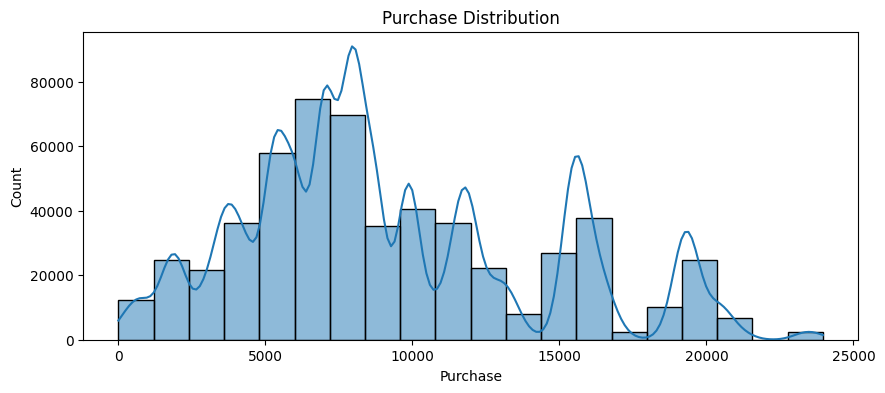

In [ ]:
# Visual Analysis - Univariate & Bivariate

# Univariate analysis for continuous variable(s) - 'Purchase'
plt.figure(figsize=(10, 4))


sns.histplot(data['Purchase'], bins=20, kde=True)
plt.title('Purchase Distribution')
plt.show()

# It is observed from the above histplot that majority of purchases are in the range of 6000 to 7000

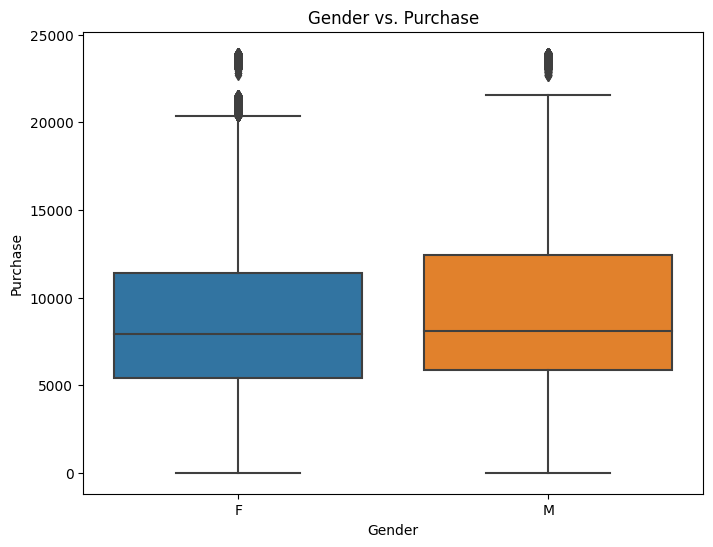

In [ ]:
# Bivariate analysis for categorical vs. continuous variable(s) - 'Gender' vs. 'Purchase'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Purchase', data=data)
plt.title('Gender vs. Purchase')
plt.show()

<Axes: xlabel='City_Category', ylabel='Purchase'>

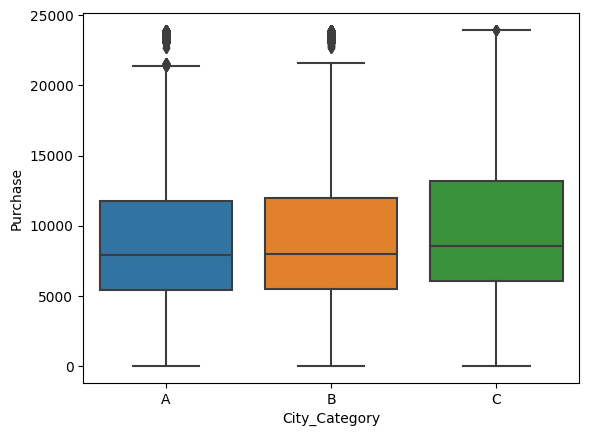

In [ ]:
# Bivariate analysis for categorical vs. continuous variable(s) - 'city_categorical' vs. 'Purchase'
sns.boxplot(x=data["City_Category"],y=data["Purchase"], data=data)

# From the graph it is observed that purchasing behaviour is almost equal for the city_category A and B and slightly more in C city_category

<ipython-input-105-888fff5c64bc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


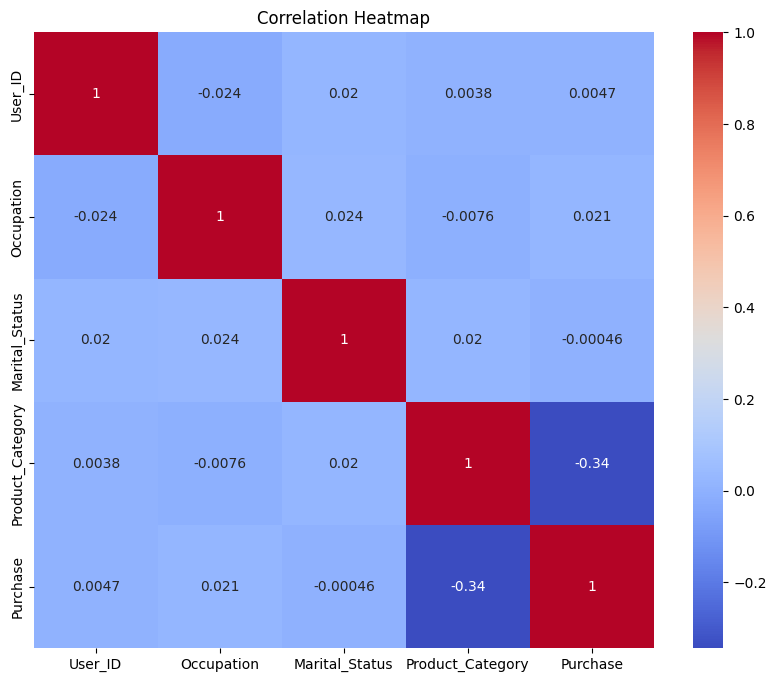

In [ ]:
# Correlation analysis
# Calculate and visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#value_counts and unique attributes
data["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
print("unique users:", data["User_ID"].nunique())
print("unique Product_Category:", data["Product_Category"].nunique())
print("unique Product_ID:", data["Product_ID"].nunique())

unique users: 5891
unique Product_Category: 20
unique Product_ID: 3631


#unique users in the data are 5891
#unique product categories are 20
# unique products are 3631

#2 )Missing Value & Outlier Detection

In [ ]:
#checking null values
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

# It is found that there are no null values in the given dataset

<Axes: xlabel='Gender', ylabel='Purchase'>

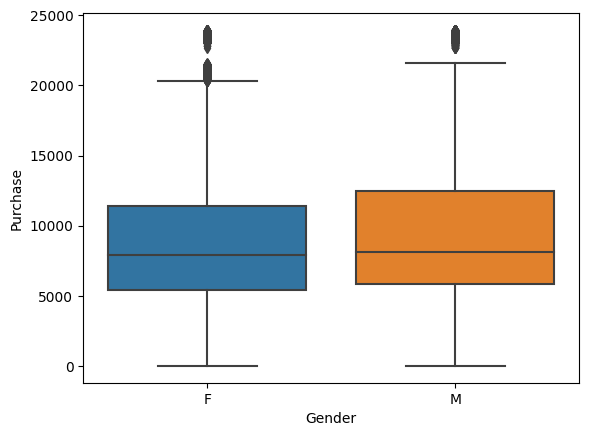

In [ ]:
sns.boxplot(x=data["Gender"],y=data["Purchase"], data=data)

#Above box plot indicates that there are outliers present in the data.

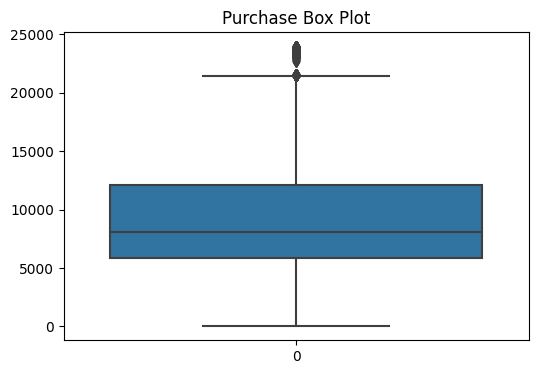

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data['Purchase'])
plt.title('Purchase Box Plot')
plt.show()

In [213]:
# Calculate the Interquartile Range (IQR)
Q1 = data['Purchase'].quantile(0.25)
Q3 = data['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Detect and count outliers
outliers = data[(data['Purchase'] > upper_bound) | (data['Purchase'] < lower_bound)]

print(outliers)
print(outliers.shape)


        User_ID Product_ID Gender    Age  Occupation City_Category  \
343     1000058  P00117642      M  26-35           2             B   
375     1000062  P00119342      F  36-45           3             A   
652     1000126  P00087042      M  18-25           9             B   
736     1000139  P00159542      F  26-35          20             C   
1041    1000175  P00052842      F  26-35           2             B   
...         ...        ...    ...    ...         ...           ...   
544488  1005815  P00116142      M  26-35          20             B   
544704  1005847  P00085342      F  18-25           4             B   
544743  1005852  P00202242      F  26-35           1             A   
545663  1006002  P00116142      M  51-55           0             C   
545787  1006018  P00052842      M  36-45           1             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
343                             3               0                10     23603  

#From the data it is observed that there are 2677 outliers are there

#3) Business Insights based on Non- Graphical and Visual Analysis

In [ ]:
#Business Insights based on Non- Graphical and Visual Analysis



1. Range of Attributes:

The dataset contains various attributes, including User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category, and Purchase.
User_ID and Product_ID are identifiers, while the other attributes represent customer demographics, purchase behavior, and product information.

2. Distribution of Variables:

Age: The 'Age' attribute shows a wide range of values, with customers falling into different age groups.

Occupation: 'Occupation' represents various customer occupations, indicating diversity in the dataset.

City_Category: The 'City_Category' feature represents three different city categories, suggesting variations in customers'
 locations.
Stay_In_Current_City_Years: This attribute shows the number of years customers have stayed in their current cities, with '4+' indicating long-term residents.

Marital_Status: 'Marital_Status' is binary, indicating whether a customer is married (1) or not (0).

Product_Category: 'Product_Category' is categorical, representing different product categories.

Purchase: The 'Purchase' variable represents the amount spent by customers, with varying purchase amounts across customers.

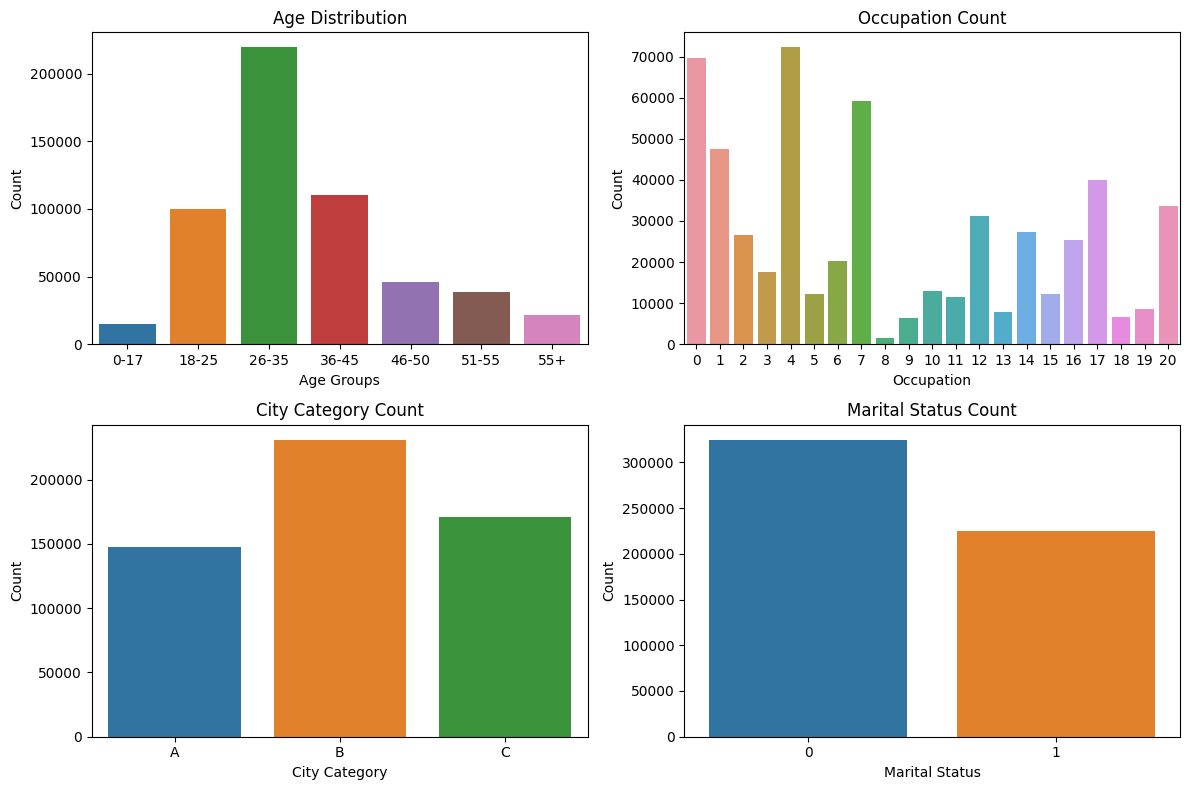

In [ ]:
# Creating a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Age Distribution
sns.countplot(data=data, x='Age', ax=axes[0, 0])
axes[0, 0].set_xlabel('Age Groups')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Age Distribution')

# Plot 2: Occupation Count
sns.countplot(data=data, x='Occupation', ax=axes[0, 1])
axes[0, 1].set_xlabel('Occupation')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Occupation Count')

# Plot 3: City Category Count
sns.countplot(data=data, x='City_Category', ax=axes[1, 0])
axes[1, 0].set_xlabel('City Category')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('City Category Count')

# Plot 4: Marital_Status Count
sns.countplot(data=data, x='Marital_Status', ax=axes[1, 1])
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Marital Status Count')

# To Adjust spacing between subplots
plt.tight_layout()

# complete figure
plt.show()

#Based on the count plots created from the dataset, the following observations can be made:

Age Distribution:

The most predominant age group among customers is 26-35, followed by 36-45 and 18-25.
Customers in the 26-35 age group form the largest segment, indicating a significant presence of individuals in their late twenties to mid-thirties.

Occupation Count:

The majority of customers have Occupation 4, followed by Occupation 0 and Occupation 7.
Occupation 4 appears to be the most common occupation among customers, suggesting a potential focus area for marketing and product targeting.

City Category Count:

The most common city category among customers is City Category B, followed by City Categories A and C.
City Category B has the highest representation, indicating that a significant proportion of customers reside in cities falling under this category.

Marital Status Count:

The majority of customers are single (Marital_Status = 0).
Single individuals make up the largest segment of customers in the dataset.










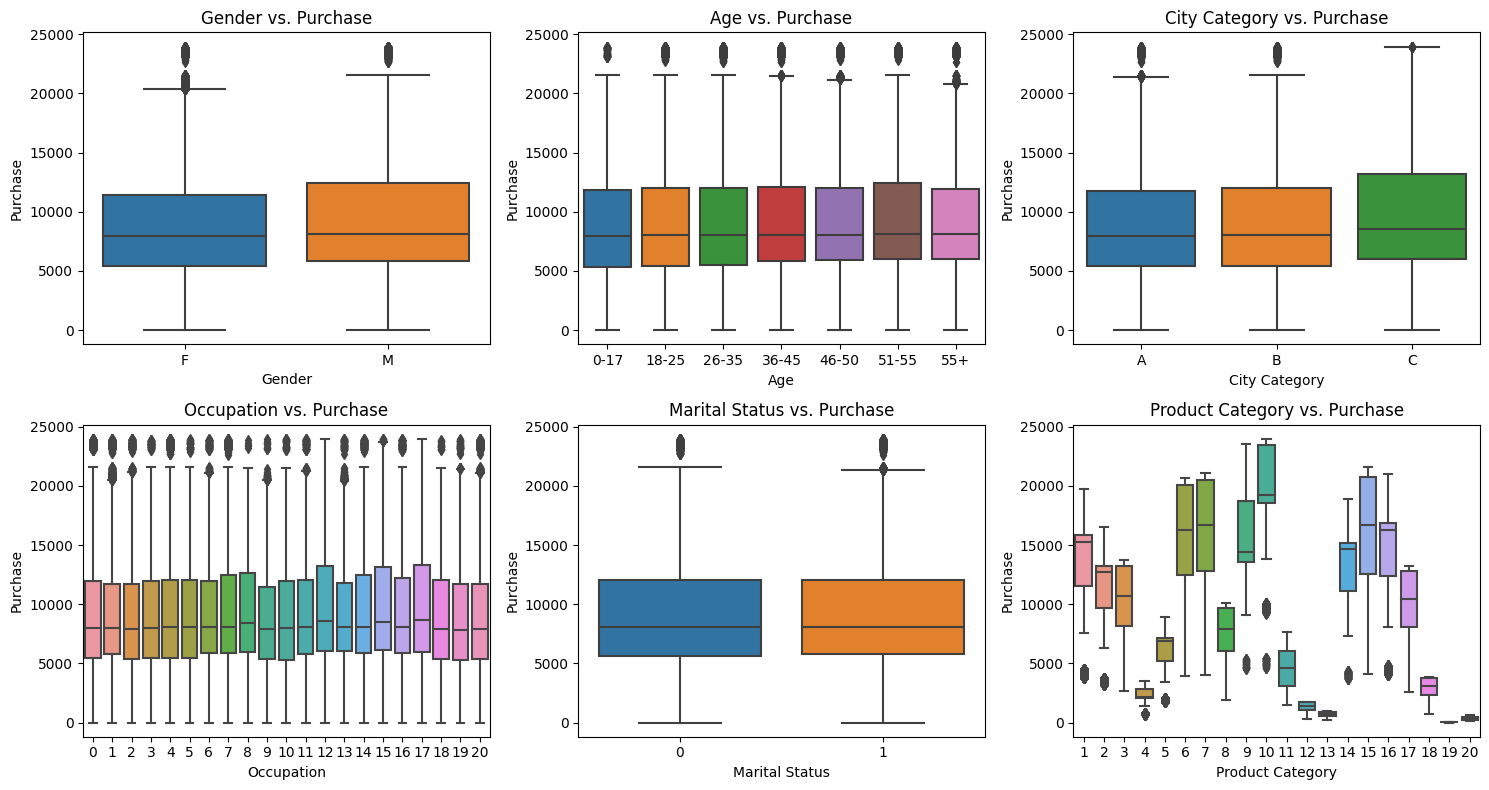

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Creating a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot 1: Gender vs. Purchase
sns.boxplot(x=data["Gender"], y=data["Purchase"], ax=axes[0, 0])
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Purchase')
axes[0, 0].set_title('Gender vs. Purchase')

# Plot 2: Age vs. Purchase
sns.boxplot(x=data["Age"], y=data["Purchase"], ax=axes[0, 1])
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Purchase')
axes[0, 1].set_title('Age vs. Purchase')

# Plot 3: City_Category vs. Purchase
sns.boxplot(x=data["City_Category"], y=data["Purchase"], ax=axes[0, 2])
axes[0, 2].set_xlabel('City Category')
axes[0, 2].set_ylabel('Purchase')
axes[0, 2].set_title('City Category vs. Purchase')

# Plot 4: Occupation vs. Purchase
sns.boxplot(x=data["Occupation"], y=data["Purchase"], ax=axes[1, 0])
axes[1, 0].set_xlabel('Occupation')
axes[1, 0].set_ylabel('Purchase')
axes[1, 0].set_title('Occupation vs. Purchase')

# Plot 5: Marital_Status vs. Purchase
sns.boxplot(x=data["Marital_Status"], y=data["Purchase"], ax=axes[1, 1])
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Purchase')
axes[1, 1].set_title('Marital Status vs. Purchase')

# Plot 6: Product_Category vs. Purchase
sns.boxplot(x=data["Product_Category"], y=data["Purchase"], ax=axes[1, 2])
axes[1, 2].set_xlabel('Product Category')
axes[1, 2].set_ylabel('Purchase')
axes[1, 2].set_title('Product Category vs. Purchase')

# Adjusting spacing between subplots
plt.tight_layout()

# Showing the figure with all subplots
plt.show()


#Based on the analysis of the boxplots, the following observations can be made:

Gender vs. Purchase:

Both male and female customers exhibit a similar purchasing pattern, with no significant difference in their spending behavior.

Age vs. Purchase:

Across all age groups, customers display a similar purchasing pattern, indicating that age does not strongly influence purchase amounts.

City Category vs. Purchase:

City categories A and B show a similar purchase pattern, while city category C exhibits a slight increase in purchase amounts. However, the differences between city categories are not substantial.

Marital Status vs. Purchase:

Customers with different marital statuses (single and married) have similar purchasing behavior, with no significant distinction in their spending patterns.

Product Category vs. Purchase:

Product category 10 stands out as it has a notably higher purchase volume compared to other product categories. This suggests that customers are more inclined to purchase products within this category.

#4) Answering questions

#1 Are women spending more money per transaction than men? Why or Why not?

In [ ]:
gender_data=data.groupby(["User_ID","Gender"])["Purchase"].sum()
gender_data=gender_data.reset_index()
gender_data.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [ ]:
# value count based on gender
gender_data["Gender"].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

In [127]:
#getting average money spent by male and female
male_avg=gender_data[gender_data["Gender"]=="M"]["Purchase"].mean()
female_avg=gender_data[gender_data["Gender"]=="F"]["Purchase"].mean()
print("male average spending:", round(male_avg,2))
print("female average spending:", round(female_avg,2))

male average spending: 925344.4
female average spending: 712024.39


It is noted that mens spend more money than women

#2 Confidence intervals and distribution of the mean of the expenses by female and male customers

In [147]:
male_data=gender_data[gender_data["Gender"]=="M"]
female_data=gender_data[gender_data["Gender"]=="F"]
male_data["Purchase"].std()

985830.1007953875

In [153]:
men_mean_values=[]
women_mean_values=[]

men_sample=200
women_sample=200
repititions =1000
for _ in range(repititions):
  men_mean=male_data.sample(men_sample)["Purchase"].mean()
  female_mean=female_data.sample(women_sample)["Purchase"].mean()
  men_mean_values.append(men_mean)
  women_mean_values.append(female_mean)
print("Population mean spending of males:",np.mean(men_mean_values))
print("std of male sample:",male_data["Purchase"].std())
print()
print("Population mean spending of females:",np.mean(women_mean_values))
print("std of female sample:",female_data["Purchase"].std())


Population mean spending of males: 925232.148795
std of male sample: 985830.1007953875

Population mean spending of females: 714654.0350550001
std of female sample: 807370.7261464577


#3 Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

In [155]:
#z score for 95 percent confident interval
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)

In [164]:
male_x1=(z1*(male_data["Purchase"].std()/np.sqrt(len(male_data)))+male_data["Purchase"].mean())
male_x2=(z2*(male_data["Purchase"].std()/np.sqrt(len(male_data)))+male_data["Purchase"].mean())
female_x1=(z1*(female_data["Purchase"].std()/np.sqrt(len(female_data)))+female_data["Purchase"].mean())
female_x2=(z2*(female_data["Purchase"].std()/np.sqrt(len(female_data)))+female_data["Purchase"].mean())
print("male confidence interval of 95 percent :", male_x1 , male_x2 )
print("male confidence interval of 95 percent :", female_x1 , female_x2 )

male confidence interval of 95 percent : 895618.3794063339 955070.4253273939
male confidence interval of 95 percent : 673255.4849374058 750793.3049785605


Now we can infer about the population that, 95% of the times:
1. Average amount spend by male customer will lie in between: (895618.3794063339, 955070.4253273939)
2. Average amount spend by female customer will lie in between: (673255.4849374058, 750793.3049785605)

overlapping is not observed between male and female confidence intervals

#4 Results when the same activity is performed for Married vs Unmarried

In [188]:
mariage_data=data.groupby(["User_ID","Marital_Status"])["Purchase"].sum()
mariage_data=mariage_data.reset_index()
mariage_data.head()

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001


In [189]:
# value count based on gender
mariage_data["Marital_Status"].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In our data more number of unmarried people are there

In [190]:
#getting average money spent by married and unmarried
unmariage_avg=mariage_data[mariage_data["Marital_Status"]==0]["Purchase"].mean()
mariage_avg=mariage_data[mariage_data["Marital_Status"]==1]["Purchase"].mean()
print("unmarried  average spending:", round(unmariage_avg,2))
print("married average spending:", round(mariage_avg,2))

unmarried  average spending: 880575.78
married average spending: 843526.8


* unmarried people spend more amount of money

In [193]:
unmar_data=mariage_data[mariage_data["Marital_Status"]==0]
mar_data=mariage_data[mariage_data["Marital_Status"]==1]


In [195]:
unmariage_values=[]
mariage_values=[]

unmariage_sample=200
mariage_sample=200
repititions =1000
for _ in range(repititions):
  unmariage=unmar_data.sample(unmariage_sample)["Purchase"].mean()
  mariage=mar_data.sample(mariage_sample)["Purchase"].mean()
  unmariage_values.append(unmariage)
  mariage_values.append(mariage)
print("Population mean spending of unmarried:",round(np.mean(unmariage_values),2))
print("std of unmarried sample:",round(unmar_data["Purchase"].std(),2))
print()
print("Population mean spending of married:",round(np.mean(mariage_values),2))
print("std of married sample:",round(mar_data["Purchase"].std(),2))


Population mean spending of unmarried: 881324.88
std of unmarried sample: 949436.25

Population mean spending of married: 841455.04
std of married sample: 935352.12


In [211]:
#z score for 95 percent confident interval
z1=norm.ppf(0.025)
z2=norm.ppf(0.975)
unmarried_x1=(z1*(unmar_data["Purchase"].std()/np.sqrt(len(unmar_data)))+unmar_data["Purchase"].mean())
unmarried_x2=(z2*(unmar_data["Purchase"].std()/np.sqrt(len(unmar_data)))+unmar_data["Purchase"].mean())
married_x1=(z1*(mar_data["Purchase"].std()/np.sqrt(len(mar_data)))+mar_data["Purchase"].mean())
married_x2=(z2*(mar_data["Purchase"].std()/np.sqrt(len(mar_data)))+mar_data["Purchase"].mean())
print("unmarried confidence interval of 95 percent :", round(unmarried_x1,2) , round(unmarried_x2,2) )
print("married confidence interval of 95 percent :", round(female_x1,2) , round(female_x2,2) )

unmarried confidence interval of 95 percent : 848741.77 912409.8
married confidence interval of 95 percent : 673255.48 750793.3


#5 Results when the same activity is performed for Age

In [201]:
amt_df = data.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df
amt_df['Age'].value_counts()
sample_size = 200
num_repitions = 1000
all_means = {}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+','0-17']
for age_interval in age_intervals:
  all_means[age_interval] = []
for age_interval in age_intervals:
  for _ in range(num_repitions):
    mean = amt_df[amt_df['Age']==age_interval].sample(sample_size,replace=True)['Purchase'].mean()
    all_means[age_interval].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  new_df = amt_df[amt_df['Age']==val]
  margin_of_error_clt =1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))

  sample_mean = new_df['Purchase'].mean()
  lower_lim = sample_mean - margin_of_error_clt
  upper_lim = sample_mean + margin_of_error_clt
  print("For age {} --> confidence interval of means: ({:.2f},{:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (325226.35,364561.66)
For age 36-45 --> confidence interval of means: (159958.40,188563.04)
For age 18-25 --> confidence interval of means: (142318.86,167933.62)
For age 46-50 --> confidence interval of means: (62258.26,80618.47)
For age 51-55 --> confidence interval of means: (54450.95,70179.72)
For age 55+ --> confidence interval of means: (28893.83,39266.89)
For age 0-17 --> confidence interval of means: (18402.36,27400.79)


#5) Final Insights

In [206]:
pd.crosstab(index=data["Gender"],columns=data["City_Category"],margins=True,normalize=True)

City_Category,A,B,C,All
Gender,,,,
F,0.064908,0.105071,0.076916,0.246895
M,0.203640,0.315192,0.234273,0.753105
All,0.268549,0.420263,0.311189,1.000000


In [205]:
 pd.crosstab(index=data["Gender"],columns=data["Marital_Status"],margins=True,normalize=True)

Marital_Status,0,1,All
Gender,,,
F,0.143293,0.103602,0.246895
M,0.447054,0.306051,0.753105
All,0.590347,0.409653,1.000000


In [208]:
 pd.crosstab(index=data["Gender"],columns=data["Age"],margins=True,normalize=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Gender,,,,,,,,
F,0.009241,0.044773,0.092265,0.049394,0.023995,0.017987,0.009241,0.246895
M,0.018214,0.136405,0.306935,0.150605,0.059087,0.052006,0.029853,0.753105
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093,1.000000


In [210]:
 pd.crosstab(index=data["Gender"],columns=data["Stay_In_Current_City_Years"],margins=True,normalize=True)

Stay_In_Current_City_Years,0,1,2,3,4+,All
Gender,,,,,,
F,0.031020,0.093258,0.044235,0.044576,0.033807,0.246895
M,0.104233,0.259101,0.140903,0.128648,0.120221,0.753105
All,0.135252,0.352358,0.185137,0.173224,0.154028,1.000000


* In the given dataset 75% are males 25% are females
* 60% are unmarried whereas 40% are married
* Majority of the people live in city category B (42%)
* Almost 40 % of people comes under 26-35 age groups
* 35% of people are living in the city for 1 year
* Product category 10 stands out as it has a notably higher purchase volume compared to other product categories. This suggests that customers are more inclined to purchase products within this category.
* It is noted that mens spend more money than women
* Average amount spend by male customer will lie in between: (895618.37, 955070.42)
Average amount spend by female customer will lie in between: (673255.48, 750793.35)
* In our data more number of unmarried people are there
* Unmarried confidence interval of 95 percent : 848741.77 912409.8
married confidence interval of 95 percent : 673255.48 750793.3

#6) Recommendations

1. Men spent more money than women, So company should focus on retaining the male
customers and getting more male customers.
2. Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these
are the products in these categories are liked more by customers. Company can focus on
selling more of these products or selling more of the products which are purchased less.
3. Unmarried customers spend more money than married customers, So company should
focus on acquisition of Unmarried customers.
4. Customers in the age 18-45 spend more money than the others, So company should
focus on acquisition of customers who are in the age 18-45
5. Male customers living in City_Category C spend more money than other male customers
living in B or C, Selling more products in the City_Category C will help the company
increase the revenue.